<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [2]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
#Summarize the dataset by displaying the column data types, counts, and missing values

print("\nColumn Data Types:")
print(df.dtypes)

print("\nNon-null Counts per Column:")
print(df.count())

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nFirst few rows of the dataset:")


Column Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Non-null Counts per Column:
ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64

Missing Values per Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyL

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here
#Generate basic statistics for numerical columns
print(df.describe())

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>

In [7]:
# Identify inconsistent or irrelevant entries in specific columns (e.g., Country)
print("\nUnique values in 'Country' column:")
print(df['Country'].unique())

# Identify and remove rows with missing or irrelevant values in the 'Country' column
df = df[df['Country'].notnull() & (df['Country'] != '')]

# Display the number of remaining rows and unique countries after cleaning
print("\nNumber of rows after removing missing/irrelevant Country entries:", len(df))
print("Unique countries after cleaning:", df['Country'].unique())


Unique values in 'Country' column:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay

In [12]:
#make a dataset with only the top 10 countries by number of data entries
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]
# Display the first few rows of the dataset with only the top 10 countries
print("\nDataset with only the top 10 countries:")
print(df_top_countries.head())


Dataset with only the top 10 countries:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [14]:
## Write your code here
#Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format
# Define a mapping for inconsistent country names
# Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format

# Example mapping for Country column
country_mapping = {
    "United States of America": "USA",
    "United Kingdom": "UK",
    "Russian Federation": "Russia",
    "Republic of Korea": "South Korea",
    "Iran, Islamic Republic of...": "Iran",
    "Viet Nam": "Vietnam",
    "Hong Kong (S.A.R.)": "Hong Kong",
    "Czech Republic": "Czechia",
    # Add more mappings as needed
}

df['Country'] = df['Country'].replace(country_mapping)

# Example mapping for EdLevel column
edlevel_mapping = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor's",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master's",
    "Doctoral degree (Ph.D., Ed.D., etc.)": "Doctorate",
    "Some college/university study without earning a degree": "Some College",
    # Add more mappings as needed
}

df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Display standardized values
print("\nStandardized Country values:")
print(df['Country'].unique())
print("\nStandardized EdLevel values:")



Standardized Country values:
['USA' 'United Kingdom of Great Britain and Northern Ireland' 'Canada'
 'Norway' 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria'
 'Switzerland' 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia'
 'Brazil' 'Japan' 'Austria' 'Iran' 'France' 'Saudi Arabia' 'Romania'
 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia' 'Pakistan'
 'Czechia' 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Russia'
 'Greece' 'Israel' 'Belgium' 'Mexico' 'United Republic of Tanzania'
 'Hungary' 'Argentina' 'Portugal' 'Sri Lanka' 'Latvia' 'China' 'Singapore'
 'Lebanon' 'Spain' 'South Africa' 'Lithuania' 'Vietnam'
 'Dominican Republic' 'Indonesia' 'Kosovo' 'Morocco' 'Taiwan' 'Georgia'
 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria' 'Liechtenstein' 'Denmark'
 'Ecuador' 'Malaysia' 'Albania' 'Azerbaijan' 'Chile' 'Ghana' 'Peru'
 'Bolivia' 'Egypt' 'Luxembourg' 'Montenegro' 'Cyprus' 'Paraguay'
 'Kazakhstan' 'Slovenia' 'Jordan' 'Venezuela, Bolivarian Republic of...

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [15]:
## Write your code here
# Encode the Employment column using one-hot encoding
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment')

# Concatenate the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Display the first few rows to verify the encoding
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [17]:
## Write your code here
#Identify columns with the highest number of missing values
missing_values = df.isnull().sum()
highest_missing = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nColumns with the highest number of missing values:")
print(highest_missing)
# Display the columns with the highest number of missing values
print("\nColumns with the highest number of missing values:")
print(highest_missing)


Columns with the highest number of missing values:
AINextMuch less integrated    57856
AINextLess integrated         56674
AINextNo change               46750
AINextMuch more integrated    45867
EmbeddedAdmired               42536
                              ...  
NEWSOSites                      629
DevType                         601
AISelect                        487
YearsCode                       344
LearnCode                       188
Length: 107, dtype: int64

Columns with the highest number of missing values:
AINextMuch less integrated    57856
AINextLess integrated         56674
AINextNo change               46750
AINextMuch more integrated    45867
EmbeddedAdmired               42536
                              ...  
NEWSOSites                      629
DevType                         601
AISelect                        487
YearsCode                       344
LearnCode                       188
Length: 107, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [20]:
## Write your code here
#Count how many blank entries there are in the ConvertedCompYearly column
blank_entries = df['ConvertedCompYearly'].isnull().sum()
print("\nNumber of blank entries in 'ConvertedCompYearly':", blank_entries)
# Display the number of blank entries
print("\nNumber of blank entries in 'ConvertedCompYearly':", blank_entries)


Number of blank entries in 'ConvertedCompYearly': 35495

Number of blank entries in 'ConvertedCompYearly': 35495


In [22]:
#Create and name a separate dataset where blank entries are removed
df_Country_no_blanks = df.dropna(subset=['ConvertedCompYearly'])

#Create and name seperate dataset where blank entries are imputed with the median of the column
df_Country_Median_Imputed = df.copy()
df_Country_Median_Imputed['ConvertedCompYearly'].fillna(df_Country_Median_Imputed['ConvertedCompYearly'].median(), inplace=True)
# Display the first few rows of the dataset with imputed values
print("\nDataset with imputed values in 'ConvertedCompYearly':")
print(df_Country_Median_Imputed.head())


Dataset with imputed values in 'ConvertedCompYearly':
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                  

C:\Users\Big Honk\AppData\Local\Temp\ipykernel_28168\1004093075.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Country_Median_Imputed['ConvertedCompYearly'].fillna(df_Country_Median_Imputed['ConvertedCompYearly'].median(), inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [24]:
#Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value
remote_work_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(remote_work_mode, inplace=True)
# Display the first few rows to verify the imputation
print("\nDataset after imputing missing values in 'RemoteWork':")
print(df.head())



Dataset after imputing missing values in 'RemoteWork':
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                       

C:\Users\Big Honk\AppData\Local\Temp\ipykernel_28168\2809331348.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(remote_work_mode, inplace=True)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [26]:
%pip install scikit-learn

#Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the first few rows to verify normalization
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------  10.5/10.7 MB 59.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 54.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ------------- -------------------------- 12.6/38.4 MB 67.8 MB/s eta 0:00:01
   --------------------------------- ------ 32.2/38.4 MB 77.3 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 69.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [27]:
# Log-transform the ConvertedCompYearly column to reduce skewness
import numpy as np

# Add 1 to avoid log(0) if there are zeros in the data
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# Display the first few rows to verify the transformation
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].head())


   ConvertedCompYearly  ConvertedCompYearly_Log
0                  NaN                      NaN
1                  NaN                      NaN
2                  NaN                      NaN
3                  NaN                      NaN
4                  NaN                      NaN


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [30]:
## Write your code here
# Create a new column `ExperienceLevel` based on the `YearsCodePro` column

def experience_level(years):
    try:
        years = float(years)
    except:
        return 'Unknown'
    if years < 3:
        return 'Beginner'
    elif years < 7:
        return 'Intermediate'
    else:
        return 'Expert'

df['ExperienceLevel'] = df['YearsCodePro'].apply(experience_level)

# Display the first few rows to verify the new column
print(df[['YearsCodePro', 'ExperienceLevel']].head())

  YearsCodePro ExperienceLevel
0          NaN          Expert
1           17          Expert
2           27          Expert
3          NaN          Expert
4          NaN          Expert


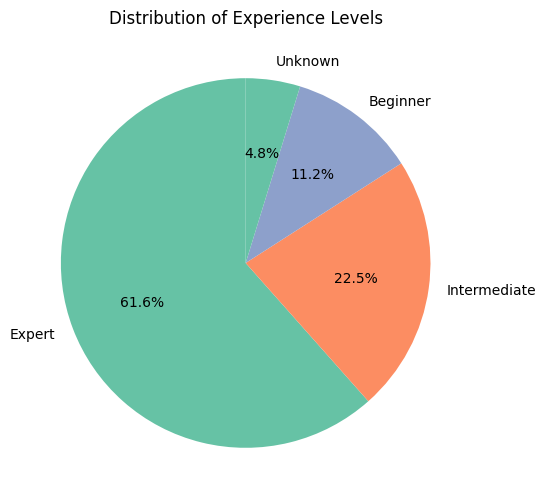

In [31]:
#Give a pie chart of the distribution of the `ExperienceLevel` column
import matplotlib.pyplot as plt
# Count the occurrences of each experience level
experience_counts = df['ExperienceLevel'].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6))
experience_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Experience Levels')
plt.ylabel('')  # Hide the y-label
plt.show()

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
